<h3>Import SQL Database into Pandas</h3>

In [1]:
# Dependencies
import pandas as pd
import os 
import csv 
from sqlalchemy import create_engine

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

In [2]:
# Create postgres database connection
connection_string = "postgres:postgres@localhost:5432/sqlchallenge"
engine = create_engine(f'postgresql://{connection_string}')

In [3]:
# Create engine connection
conn = engine.connect()

In [4]:
# Create dataframes for all tables
employees_df = pd.read_sql("SELECT * FROM employees", conn, parse_dates=["bith_date", "hire_date"])
department_df = pd.read_sql("SELECT * FROM department", conn)
dept_emp = pd.read_sql("SELECT * FROM dept_emp", conn)
dept_manager = pd.read_sql("SELECT * FROM dept_manager", conn)
salary_df = pd.read_sql("SELECT * FROM salary", conn)
titles_df = pd.read_sql("SELECT * FROM titles", conn)

<h2> Most common salary ranges for employees </h2>

In [5]:
salary_df

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [6]:
x = salary_df['salary']
x

0         60117
1         65828
2         40006
3         40054
4         78228
          ...  
300019    40000
300020    58058
300021    49597
300022    40000
300023    63707
Name: salary, Length: 300024, dtype: int64

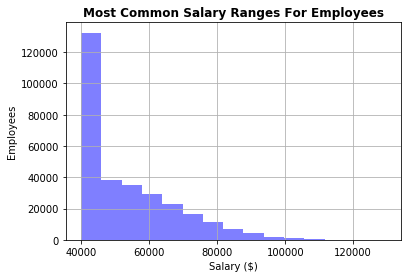

In [7]:
plt.hist(x, bins=15, facecolor='blue', alpha=0.5)

# Set labels
plt.xlabel('Salary ($)')
plt.ylabel('Employees')
plt.title('Most Common Salary Ranges For Employees', fontweight="bold")
plt.grid()

# Save image
plt.savefig("./images/most_common_salary_ranges_for_employees.png", bbox_inches='tight')

plt.show()

<h2> Average salary by title </h2>

In [8]:
# Create dataframe
query_df = pd.read_sql("SELECT s.salary, t.title FROM titles as t JOIN employees as e ON t.title_id = e.emp_title_id JOIN salary as s ON e.emp_no = s.emp_no", conn)
query_df                  

,salary,title
0,78228,Staff
1,72488,Engineer
2,42365,Staff
3,55881,Senior Engineer
4,41538,Senior Engineer
...,...,...
300019,49383,Senior Engineer
300020,41002,Senior Engineer
300021,40000,Staff
300022,52282,Staff


In [9]:
# Group by title
grouped_df = query_df.groupby('title').mean()
grouped_df

,salary
title,
Assistant Engineer,48564.434447
Engineer,48535.336511
Manager,51531.041667
Senior Engineer,48506.799871
Senior Staff,58550.172704
Staff,58465.382850
Technique Leader,48582.896092


In [10]:
# Add index
grouped_df = grouped_df.reset_index()
grouped_df

,title,salary
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704
5,Staff,58465.382850
6,Technique Leader,48582.896092


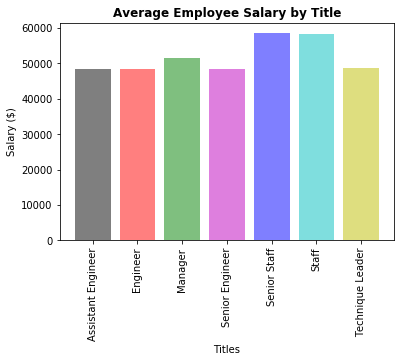

In [11]:
# Set x axis, y axis & Tick Locations
x_axis = grouped_df["title"]
ticks = np.arange(len(x_axis))
y_axis = grouped_df["salary"]
 
# Create Bar Chart Based on Above Data
plt.bar(x_axis, y_axis, align="center", alpha=0.5, color=["k", "r", "g", "m", "b", "c", "y"])

# Create Ticks for Bar Chart's x_axis
plt.xticks(ticks, x_axis, rotation="vertical")

# Set Labels & Title
plt.ylabel("Salary ($)")
plt.xlabel("Titles")
plt.title("Average Employee Salary by Title", fontweight = "bold")

# Save Figure
plt.savefig("./images/average_salary_by_title.png", bbox_inches='tight')


plt.show()